In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clustered data (adjust path as needed)
data_path = '../../data/nifty/train/full_featured.csv'
df = pd.read_csv(data_path)

# If you have a saved clustered DataFrame, load it here instead
# df = pd.read_csv('path_to_clustered_data.csv')

# If needed, re-run clustering to get the 'cluster' column
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd','trend_code'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters
df_clustered.head()

,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,stoch_smoothd,dow_trend_spec_raw,dow_trend_spec,range,avg_range,is_mother_candle,mother_candle_trend,final_trend,trend_code,cluster
33,2001-02-16 00:00:00+05:30,1415.85,1422.95,1376.15,1381.35,0,-0.024952,-0.025269,46.8,1396.96,...,79.212137,Downtrend,Downtrend,46.8,26.5475,True,Sideways,Downtrend,0,2
34,2001-02-19 00:00:00+05:30,1381.40,1392.05,1369.45,1384.80,0,0.002498,0.002494,22.6,1393.48,...,74.632775,Sideways,Downtrend,22.6,26.3025,False,Sideways,Sideways,1,2
35,2001-02-20 00:00:00+05:30,1384.85,1392.80,1380.40,1383.85,0,-0.000686,-0.000686,12.4,1392.01,...,64.115442,Sideways,Downtrend,12.4,25.7950,False,Sideways,Sideways,1,2
36,2001-02-21 00:00:00+05:30,1383.90,1389.55,1364.25,1370.10,0,-0.009936,-0.009986,25.3,1387.36,...,53.502922,Downtrend,Downtrend,25.3,26.2825,False,Downtrend,Downtrend,0,0
37,2001-02-22 00:00:00+05:30,1370.05,1370.05,1335.65,1355.10,0,-0.010948,-0.011008,34.4,1375.04,...,42.133872,Downtrend,Downtrend,34.4,27.2150,True,Sideways,Downtrend,0,0


In [5]:
# Mean and std of features by cluster
profile = df_clustered.groupby('cluster')[features].agg(['mean', 'std'])
profile

daily_return           log_return           price_range              \
                mean       std       mean       std        mean         std   
cluster                                                                       
0          -0.003371  0.016694  -0.003518  0.016837  120.753496  102.223400   
1           0.001200  0.008256   0.001165  0.008250  180.831556  112.892072   
2           0.003608  0.010670   0.003546  0.010534   65.041207   43.046829   

                 ma_5                      ma_20               ...  \
                 mean          std          mean          std  ...   
cluster                                                        ...   
0         7648.361261  6098.371667   7774.446788  6169.826271  ...   
1        18432.513247  4682.342144  18194.127192  4683.560696  ...   
2         5480.291939  3287.662632   5394.990957  3265.449623  ...   

        macd_histogram_12_26              stoch_14            stoch_smoothk  \
                        mean        std       mean        std          mean   
cluster                                                                       
0                 -21.985364  31.910076  25.819839  17.536632     27.752193   
1                  18.007602  45.250920  76.224767  21.159684     76.991980   
2                  12.185517  19.942316  82.059793  14.526924     80.187799   

                   stoch_smoothd            trend_code            
               std          mean        std       mean       std  
cluster                                                           
0        16.235368     30.252273  17.815241   0.739409  0.862633  
1        18.565246     77.115829  18.115656   1.207831  0.897780  
2        14.238403     78.064176  16.274951   1.387682  0.844965  

[3 rows x 30 columns]

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_3752\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_3752\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_3752\2677951597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
C:\Users\Sandeep\AppData\Loc

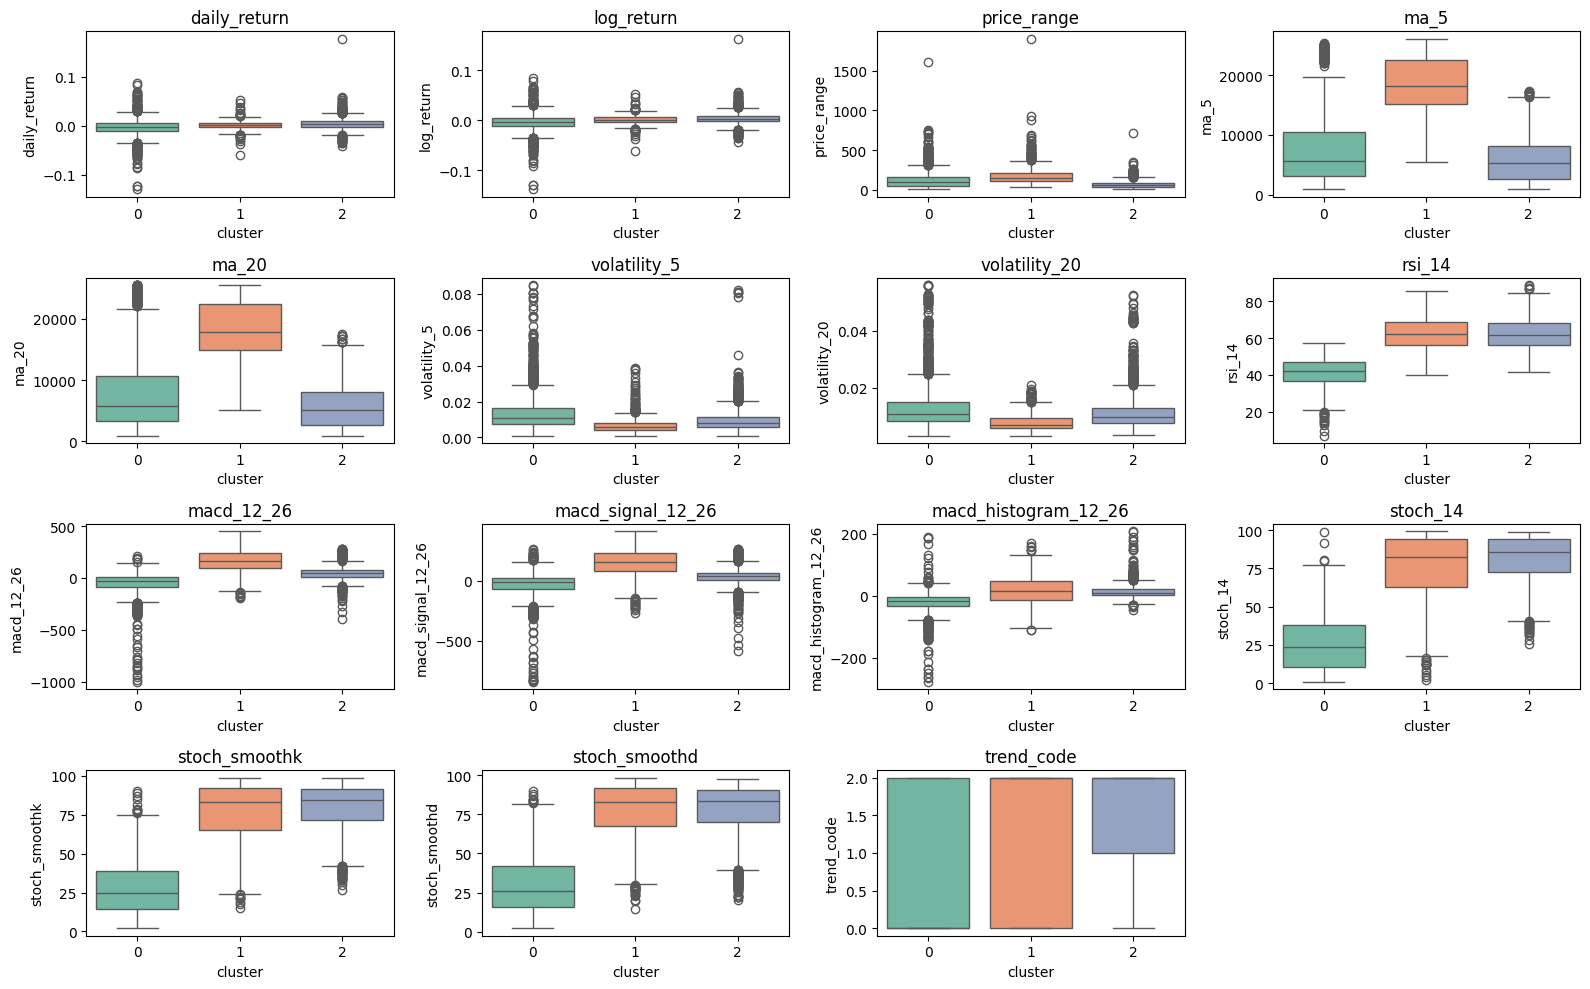

In [6]:
# Boxplots for each feature by cluster
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='cluster', y=feature, data=df_clustered, palette='Set2')
    plt.title(feature)
    plt.tight_layout()
plt.show()